<a href="https://colab.research.google.com/github/samartha007/Heart-disease-prediction/blob/main/Heart_Deisease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Useing the Supervised and Unsupervised Alogrithms

#### List of Algorithms

1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbours
4. Support Vector Machine
5. Decision Tree 
6. Bagging  Decision Tree (Ensemble Learning I)
7. Boosted Decision Tree (Ensemble Learning II)
8. Random Forest (Ensemble Learning III)
9. Deep Learning with a neuronal network
10. Voting Classification (Ensemble Learning IV)

# Data import

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


It is collected from kaggle data set

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/heart.csv")
dataset.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## EDA(Explanetory Data Analysis)

## Import and get to know the data
Data Cleaning

a) Check the data type

b) Check for missing values and replace them

c) Check for duplicate rows

d) Statistics summary

e) Outliers and how to remove them

3. Distributions and Relationship

a) Categorical variable distribution

b) Continuous variable distribution

c) Relationship between categorical and continuous variables


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline


In [ ]:
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

b) Check for missing values and replace them



In [ ]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

c) Check for duplicate rows

In [ ]:
duplicated=dataset.duplicated().sum()
if duplicated:
  print("Duplicates Rows in dataset are :{}".format(duplicated))
else:
  print("Dataset contains no Duplicate Values")


Dataset contains no Duplicate Values


d) Statistics summary

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Before we plot the outliers, let's change the labeling for better visualization and interpretation.


In [ ]:
df=dataset
df['HeartDisease'] = df.HeartDisease.replace({1: "Disease", 0: "No_disease"})
df['Sex'] = df.Sex.replace({1: "Male", 0: "Female"})
df['ChestPainType'] = df.ChestPainType.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['ExerciseAngina'] = df.ExerciseAngina.replace({1: "Yes", 0: "No"})
df['FastingBS'] = df.FastingBS.replace({1: "True", 0: "False"})
df['ST_Slope'] = df.ST_Slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})


In [ ]:
df.info()
dataset.FastingBS.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


array(['False', 'True'], dtype=object)

e) Outliers and how to remove them



Age               AxesSubplot(0.125,0.536818;0.110714x0.343182)
RestingBP      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Cholesterol    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
MaxHR          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Oldpeak        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

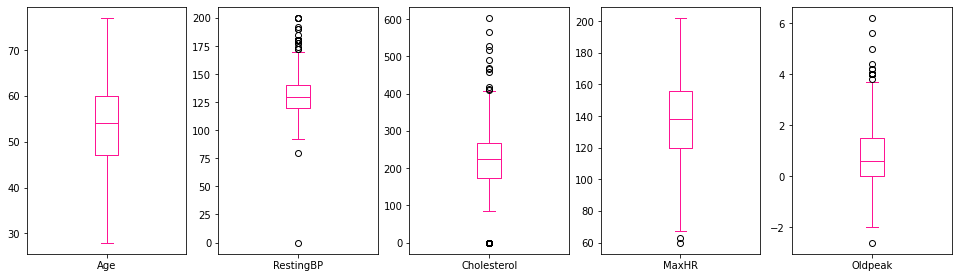

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,6),sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [ ]:
fig = px.box(df, x="HeartDisease", y="Cholesterol")
fig.show()


Now, let’s define and list out the outliers..!!

In [ ]:
# define continuous variable & plot
continous_features = ['Age','RestingBP','Cholesterol','Oldpeak']
## Developing a function to print the variable and number of outliers in it.  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:  ## This loop will run through every columns of the cotinuous data frame
        feature_data = df_out[each_feature]  ## The feature_data will exttract the values of the selected cloumn
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  ## This will give the ouliers 
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers))) ## This will be printed when there is no outlier
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])


For the feature Age, No of Outliers is 0
For the feature RestingBP, No of Outliers is 28
For the feature Cholesterol, No of Outliers is 183
For the feature Oldpeak, No of Outliers is 16


Let’s drop the outliers.

In [ ]:
outliers(df[continous_features],drop=True) ## Removing outlier

Outliers from Age feature removed
Outliers from RestingBP feature removed
Outliers from Cholesterol feature removed
Outliers from Oldpeak feature removed


The number of outlier is not that much so dropiing this will not effect the analysis but if the ouotlier are like more that 1/3 of the data then we have to look for alternative information regarding the data and take different measure to work with the data.

Distributions and relationship.

No_disease    377
Disease       325
Name: HeartDisease, dtype: int64


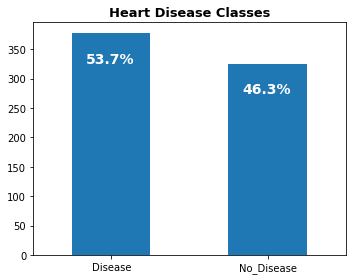

In [ ]:
print(df.HeartDisease.value_counts())

fig, ax = plt.subplots(figsize=(5,4)) ##Here we want to fixed the plot size
name = ["Disease", "No_Disease"]
ax = df.HeartDisease.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()


Age variable distribution

Text(0.5, 1.0, 'Age Distribution')

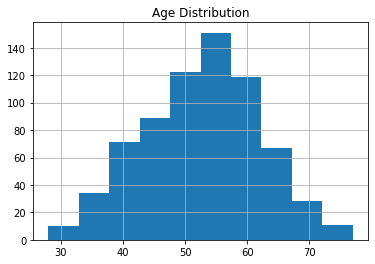

In [ ]:
# print(df.age.value_counts())
df['Age'].hist().plot(kind='bar')
plt.title('Age Distribution')


54    44
58    33
55    32
57    29
48    29
52    28
56    26
51    25
62    24
59    23
Name: Age, dtype: int64


Text(0, 0.5, 'Age distribution')

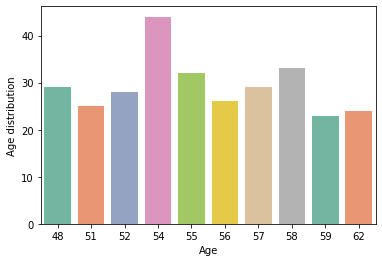

In [ ]:
# Analyze distribution in age in range 10
print(df.Age.value_counts()[:10])
sns.barplot(x=df.Age.value_counts()[:10].index,
y=df.Age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')


Most of the patients are in the age between 45s to 60s. Let’s take a quick look basic stats. The mean age is about 54 years with ±9.08 std, the youngest is at 29 and the oldest is at 77.



In [ ]:
## To Know the yougest and oldest in age
print(min(df['Age']))
print(max(df['Age']))
print(df['Age'].mean())

28
77
52.72222222222222


Gender distribution according to target variable

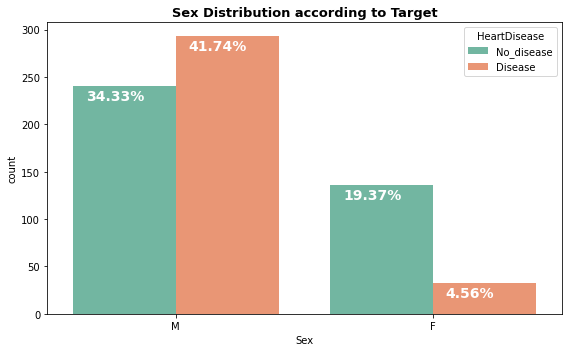

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

From the bar graph, we can observe that among disease patients, male are higher than female.



Chest pain distribution according to target variable

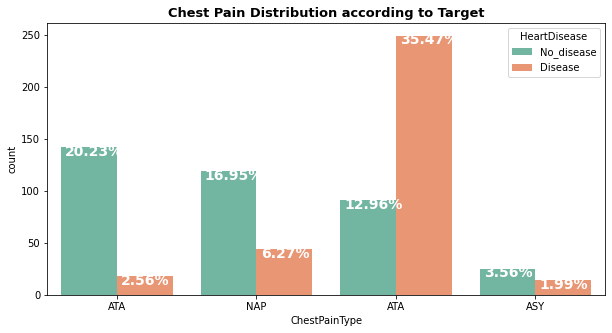

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ChestPainType']
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-8,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

Chest pain (cp) or angina is a type of discomfort caused when heart muscle doesn’t receive enough oxygen rich blood, which triggered discomfort in arms, shoulders, neck, etc.

However, looking at the bar graph above, its raised a question of higher number of healthy subject having typical_angina.Chest pain can be subjective due to stress, physical activities and many more and varies between gender. Women and elderly patients usually have atypical symptoms with a history of disease. 



Fasting blood sugar distribution according to target variable

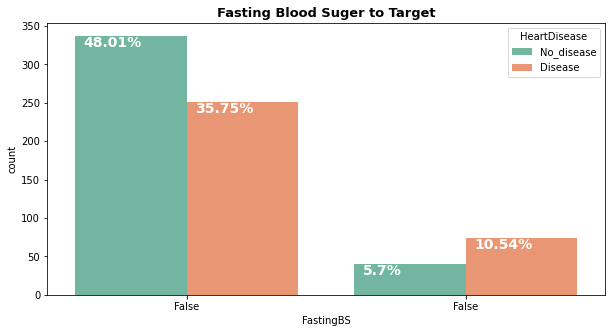

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = dataset['FastingBS']
ax = sns.countplot(x='FastingBS', hue='HeartDisease', data=dataset, palette='Set2')
ax.set_title("Fasting Blood Suger to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-14,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/heart.csv")
dataset.info() 
print(dataset['Sex'].unique())
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
# print(one_hot_encoded_data)
one_hot_encoded_data.info()
x = one_hot_encoded_data.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,19,20]].values
y = one_hot_encoded_data.iloc[:, 6].values
# dataset.head(5)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
['M' 'F']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -------------- 

#### b) Check out the dataset

In [ ]:
# check otu a sample
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train[5])

(688, 19)
(230, 19)
(688,)
(230,)
[ 55.  133.  185.    0.  136.    0.2   0.    1.    0.    0.    1.    0.
   0.    0.    1.    1.    0.    0.    1. ]


In [ ]:
# ## Scaling the data test
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# # define standard scaler
# # scaler = StandardScaler()
# # scaled = scaler.fit_transform(x_train)
# # print(scaled)
# ##
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test=scaler.fit_transform(x_test)

# # print(scaled)

# 1. Naive Bayes
Sklearn Documentation: 
* Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html
* MultinomialNB: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [ ]:
%%time

from sklearn.naive_bayes import MultinomialNB ## we MultinomialNB
from sklearn.preprocessing import MinMaxScaler ## 

scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x_train)
x1_test=scaler.fit_transform(x_test)

mnb = MultinomialNB().fit(x1_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(mnb.score(x1_test, y_test)))
print("score on train: "+ str(mnb.score(x1_train, y_train)))

train shape: (688, 19)
score on test: 0.8347826086956521
score on train: 0.8706395348837209
CPU times: user 10.8 ms, sys: 926 µs, total: 11.7 ms
Wall time: 15.1 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=mnb.predict(x1_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# Assigning columns names
# cm_df = pd.DataFrame(cm, 
#             columns = ['Predicted Negative', 'Predicted Positive'],
#             index = ['Actual Negative', 'Actual Positive'])
# # Showing the confusion matrix
# cm_df

# Creating a function to report confusion metrics
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.88
Specificity: 0.79
Precision: 0.79
f_1 Score: 0.83


# 2. Logistic Regression

Sklearn Documentation: 
* LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* SGD Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=5000)
lr.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.8434782608695652
score on train: 0.8706395348837209
CPU times: user 364 ms, sys: 253 ms, total: 618 ms
Wall time: 420 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=lr.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.9
Specificity: 0.78
Precision: 0.78
f_1 Score: 0.83


In [ ]:
%%time
#logistic regression with stochastic gradient decent
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(sgd.score(x_test, y_test)))
print("score on train: "+ str(sgd.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.5434782608695652
score on train: 0.5508720930232558
CPU times: user 11.7 ms, sys: 14.2 ms, total: 25.9 ms
Wall time: 18.1 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=sgd.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.54
Mis-Classification: 0.46
Sensitivity: 0.96
Specificity: 0.07
Precision: 0.07
f_1 Score: 0.12


# 3. K-Nearest Neighbours

Sklearn Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5,algorithm = 'ball_tree')
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.6652173913043479
score on train: 0.7906976744186046
CPU times: user 112 ms, sys: 238 ms, total: 350 ms
Wall time: 361 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=knn.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.72
Specificity: 0.61
Precision: 0.61
f_1 Score: 0.66


# 4. Support Vector Machine

Sklearn Documentation:
* SVM Overview: https://scikit-learn.org/stable/modules/svm.html
* LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC


In [ ]:
%%time

from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.717391304347826
score on train: 0.752906976744186
CPU times: user 41.4 ms, sys: 7.84 ms, total: 49.2 ms
Wall time: 52.5 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=svm.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.8
Specificity: 0.63
Precision: 0.63
f_1 Score: 0.7


# 5. Decision Tree

Sklearn Documentation:

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
%%time

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=10,max_depth=3)
clf.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.8130434782608695
score on train: 0.8561046511627907
CPU times: user 26.2 ms, sys: 17.1 ms, total: 43.3 ms
Wall time: 80.3 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=clf.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.85
Specificity: 0.77
Precision: 0.77
f_1 Score: 0.81


# 6. Bagging Decision Tree

Sklearn Documentation:

* overview ensemble methods: https://scikit-learn.org/stable/modules/ensemble.html
* bagging classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html


In [ ]:
%%time

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bg=BaggingClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=3),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(bg.score(x_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.8608695652173913
score on train: 0.8677325581395349
CPU times: user 58.6 ms, sys: 5.23 ms, total: 63.9 ms
Wall time: 153 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=bg.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.93
Specificity: 0.79
Precision: 0.79
f_1 Score: 0.85


# 7. Boosting Decision Tree

Sklearn Documentation:

* AdaBoost Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
* Gradien Boosting Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier


In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# setting 
# min_samples_split=10
# max_depth=4

adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.5)
adb.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(adb.score(x_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.8
score on train: 0.9898255813953488
CPU times: user 301 ms, sys: 4.07 ms, total: 305 ms
Wall time: 301 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=adb.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.86
Specificity: 0.73
Precision: 0.73
f_1 Score: 0.79


In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

# setting 
# min_samples_split=10
# max_depth=4

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(gbc.score(x_test, y_test)))
print("score on train: "+ str(gbc.score(x_train, y_train)))

train shape: (688, 19)
score on test: 0.8391304347826087
score on train: 0.9651162790697675
CPU times: user 179 ms, sys: 0 ns, total: 179 ms
Wall time: 187 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=gbc.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.92
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.82


# 8. Random Forest

Sklearn Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of desission trees
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(x_train, y_train)

print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.8521739130434782
score on train: 0.875
CPU times: user 224 ms, sys: 4.96 ms, total: 229 ms
Wall time: 231 ms


In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
y_pred=rf.predict(x_test)
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

cm = metrics.confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')    
    

--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.93
Specificity: 0.77
Precision: 0.77
f_1 Score: 0.84


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

for clf, label in zip([ adb,lr, rf, svm], ["Abd Boosted Tree",'Logistic Regression', 'Random Forest', 'Support Vector Machine']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.84 (+/- 0.02) [Abd Boosted Tree]
Accuracy: 0.86 (+/- 0.02) [Logistic Regression]
Accuracy: 0.87 (+/- 0.02) [Random Forest]
Accuracy: 0.74 (+/- 0.03) [Support Vector Machine]
CPU times: user 4 s, sys: 1.55 s, total: 5.54 s
Wall time: 3.92 s


# 9. Deep Learning 

Keras Documentation:
* Sequential Model: https://keras.io/guides/sequential_model/

In [ ]:
%%time

from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
# split an additional validation dataset
x_validation=x_train[:100]
x_partial_train=x_train[100:]
y_validation=y_train[:100]
y_partial_train=y_train[100:]
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(19,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))


print('')
print("train shape: " + str(x_train.shape))
print("score on test: " + str(model.evaluate(x_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(x_train,y_train)[1]))


Epoch 1/4
2/2 [==============================] - 1s 216ms/step - loss: 40.8351 - accuracy: 0.4269 - val_loss: 26.0851 - val_accuracy: 0.5200
Epoch 2/4
2/2 [==============================] - 0s 38ms/step - loss: 31.3527 - accuracy: 0.4252 - val_loss: 21.0914 - val_accuracy: 0.5200
Epoch 3/4
2/2 [==============================] - 0s 31ms/step - loss: 25.4904 - accuracy: 0.4303 - val_loss: 17.0140 - val_accuracy: 0.5400
Epoch 4/4
2/2 [==============================] - 0s 28ms/step - loss: 20.7200 - accuracy: 0.4456 - val_loss: 13.7279 - val_accuracy: 0.5700

train shape: (688, 19)
8/8 [==============================] - 0s 2ms/step - loss: 15.7210 - accuracy: 0.5130
score on test: 0.5130434632301331
22/22 [==============================] - 0s 2ms/step - loss: 16.4772 - accuracy: 0.4782
score on train: 0.4781976640224457
CPU times: user 3.8 s, sys: 411 ms, total: 4.21 s
Wall time: 4.81 s


In [ ]:
%%time

from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics

# add validation dataset
validation_split=100
x_validation=x_train[:validation_split]
x_partial_train=x_train[validation_split:]
y_validation=y_train[:validation_split]
y_partial_train=y_train[validation_split:]

model=models.Sequential()
model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(19,)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))

print('')
print("train shape: " + str(x_train.shape))
print("score on test: " + str(model.evaluate(x_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(x_train,y_train)[1]))


Epoch 1/4
2/2 [==============================] - 1s 179ms/step - loss: 13.6867 - accuracy: 0.4660 - val_loss: 6.8542 - val_accuracy: 0.4800
Epoch 2/4
2/2 [==============================] - 0s 25ms/step - loss: 13.5983 - accuracy: 0.4660 - val_loss: 6.6432 - val_accuracy: 0.4800
Epoch 3/4
2/2 [==============================] - 0s 29ms/step - loss: 12.7732 - accuracy: 0.4541 - val_loss: 6.1777 - val_accuracy: 0.4800
Epoch 4/4
2/2 [==============================] - 0s 33ms/step - loss: 10.6520 - accuracy: 0.4473 - val_loss: 6.1039 - val_accuracy: 0.4800

train shape: (688, 19)
8/8 [==============================] - 0s 3ms/step - loss: 5.4319 - accuracy: 0.5348
score on test: 0.5347825884819031
22/22 [==============================] - 0s 1ms/step - loss: 5.1614 - accuracy: 0.5596
score on train: 0.5595930218696594
CPU times: user 1.31 s, sys: 54.2 ms, total: 1.37 s
Wall time: 1.72 s


# 10. Voting Classifier

Sklearn Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifierext*

In [ ]:
%%time

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x_train)
x1_test=scaler.fit_transform(x_test)

# 1) naive bias = mnb
mnb = MultinomialNB().fit(x1_train, y_train)
# 2) logistic regression =lr
lr=LogisticRegression(max_iter=1000)
# 3) random forest =rf
rf = RandomForestClassifier(n_estimators=30,max_depth=9)
# 4) suport vecotr mnachine = svm
svm=LinearSVC(C=0.0001)

evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)])
evc.fit(x1_train, y_train)

print("score on test: " + str(evc.score(x1_test, y_test)))
print("score on train: "+ str(evc.score(x1_train, y_train)))

score on test: 0.8434782608695652
score on train: 0.8793604651162791
CPU times: user 146 ms, sys: 120 ms, total: 266 ms
Wall time: 145 ms


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

for clf, label in zip([mnb, lr, rf, svm, evc], ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Support Vector Machine','Ensemble']):
    scores = cross_val_score(clf, x1_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.03) [Naive Bayes]
Accuracy: 0.86 (+/- 0.03) [Logistic Regression]
Accuracy: 0.87 (+/- 0.02) [Random Forest]
Accuracy: 0.81 (+/- 0.02) [Support Vector Machine]
Accuracy: 0.87 (+/- 0.03) [Ensemble]
CPU times: user 1.06 s, sys: 660 ms, total: 1.72 s
Wall time: 1.01 s
